In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv('Mall_customers.csv')

#확인
#df.head()

# 결측값 확인
print('전체 결측값 개수:', df.isnull().sum().sum())

전체 결측값 개수: 0


In [16]:
#여성과 남성의 Spending Score 비교
df_Gender_mean_score = df.groupby('Gender')['Spending Score (1-100)'].mean()
df_Gender_mean_score


Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

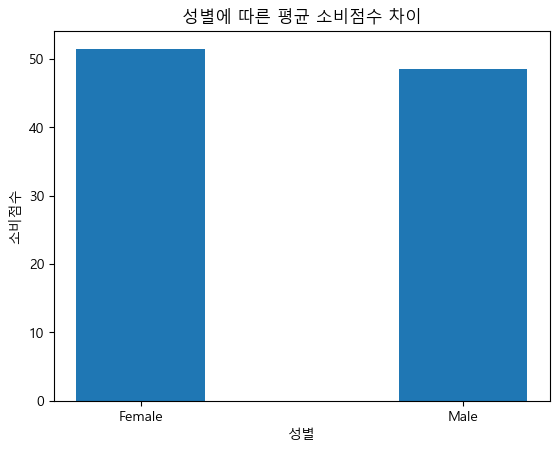

In [19]:
#그래프 출력
plt.bar(df_Gender_mean_score.index, df_Gender_mean_score.values, width=0.4)
plt.title('성별에 따른 평균 소비점수 차이')
plt.xlabel('성별')
plt.ylabel('소비점수')
plt.show()

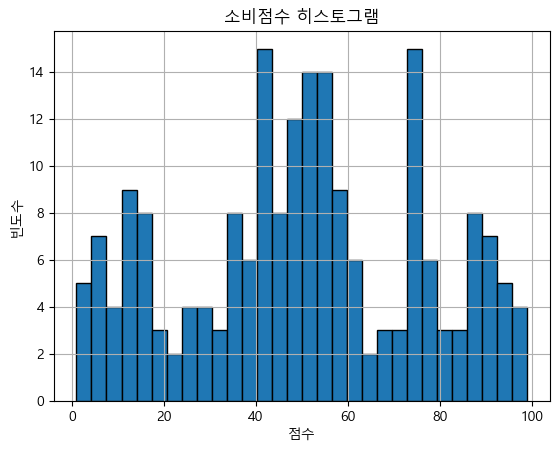

In [24]:
#소비점수 분포

plt.hist(df['Spending Score (1-100)'], bins=30, edgecolor='black')
plt.title('소비점수 히스토그램')
plt.xlabel('점수')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

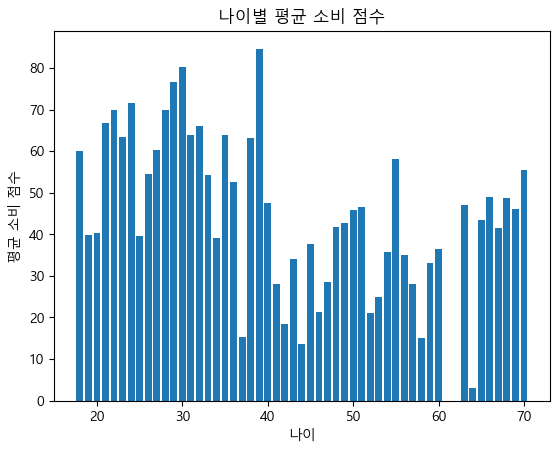

In [ ]:
#나이별 평균 소비점수
age_score = df.groupby('Age')['Spending Score (1-100)'].mean()
plt.bar(age_score.index, age_score.values)
plt.xlabel('나이')
plt.ylabel('평균 소비 점수')
plt.title('나이별 평균 소비 점수')
plt.show()
# 20대에서 30대 후반 사이에서 소비 점수가 높고, 30대 후반에서 40대까지 낮아지다가 40대 이후 서서히 증가한다.

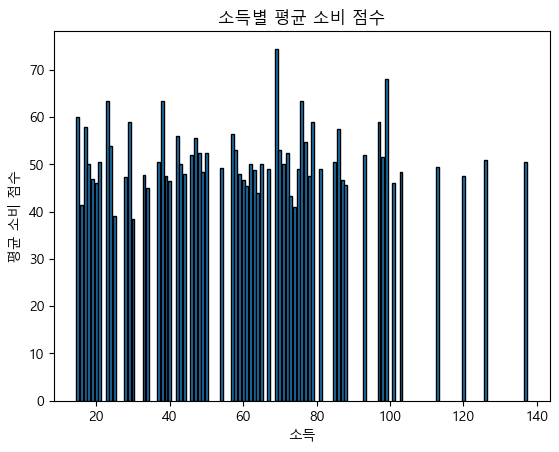

In [ ]:
#소득별 평균 소비 점수
income_score = df.groupby('Annual Income (k$)')['Spending Score (1-100)'].mean()
plt.bar(income_score.index, income_score.values, edgecolor='black')
plt.xlabel('소득')
plt.ylabel('평균 소비 점수')
plt.title('소득별 평균 소비 점수')
plt.show()
# 소득과 소비 점수는 비례하지 않다.

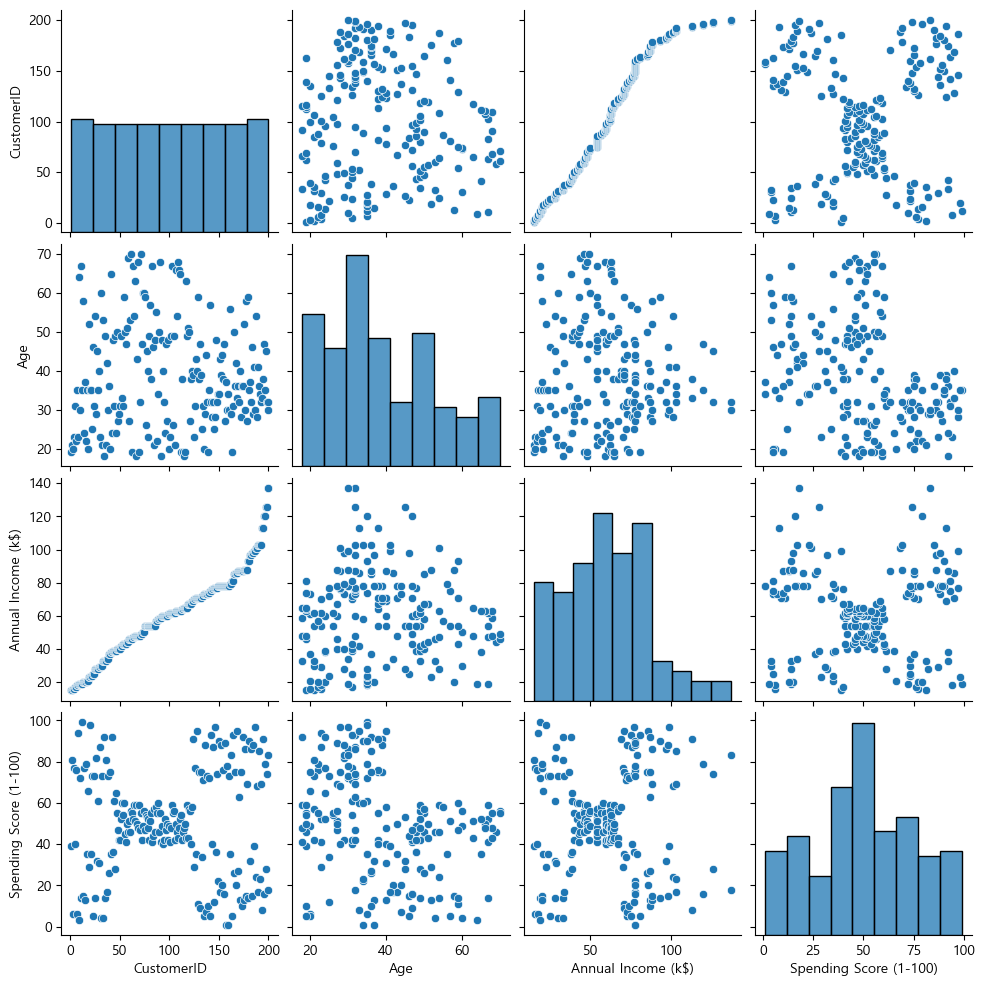

In [31]:
# 페어플롯
sns.pairplot(df)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

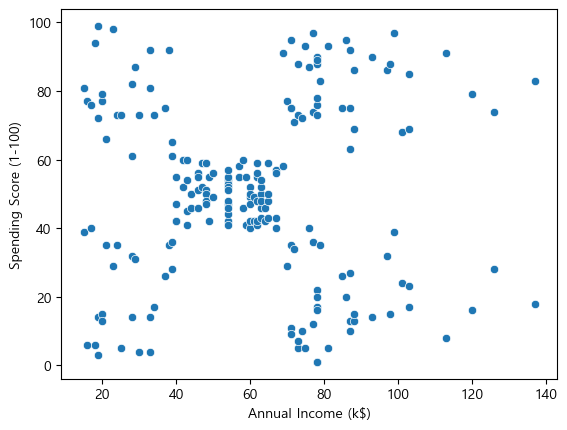

In [ ]:
#산점도 수입-소비점수간
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

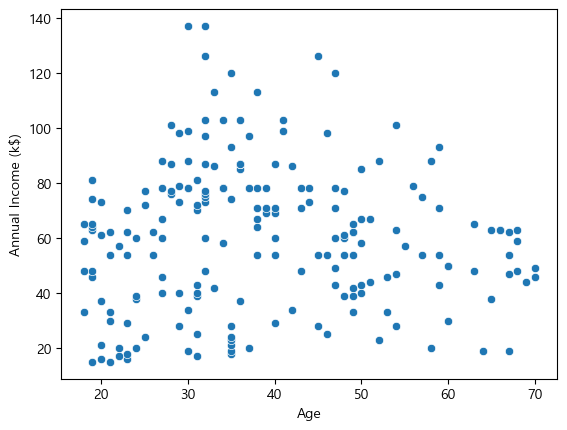

In [49]:
#산점도 나이-수입간
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

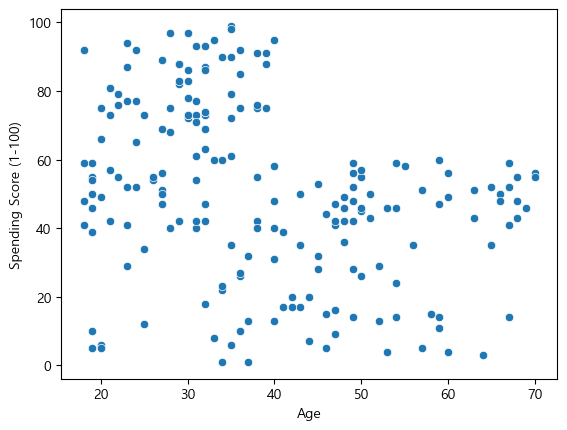

In [ ]:
#산점도 나이-소비점수간
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

In [47]:
# 소득이 적으면서 소비가 높은 경우를 제외.(이상치로 설정)
income_low_boundary = 40
score_high_boundary = 65

#데이터 제거
df_filter = df[(df['Annual Income (k$)'] >= income_low_boundary) | (df['Spending Score (1-100)'] < 70)]
print(df_filter.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
2           3  Female   20                  16                       6
4           5  Female   31                  17                      40
6           7  Female   35                  18                       6
8           9    Male   64                  19                       3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

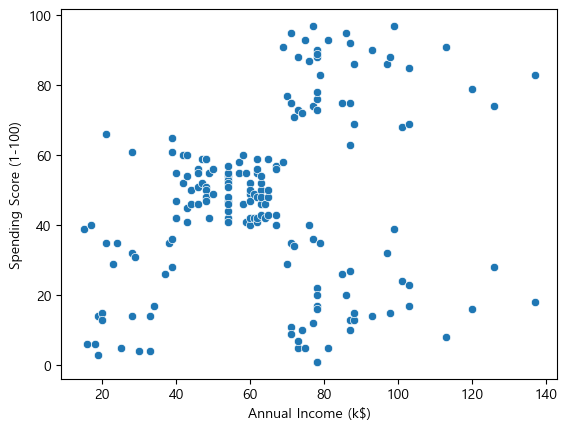

In [48]:
#필터링 후 수입-소비점수 산점도
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_filter)

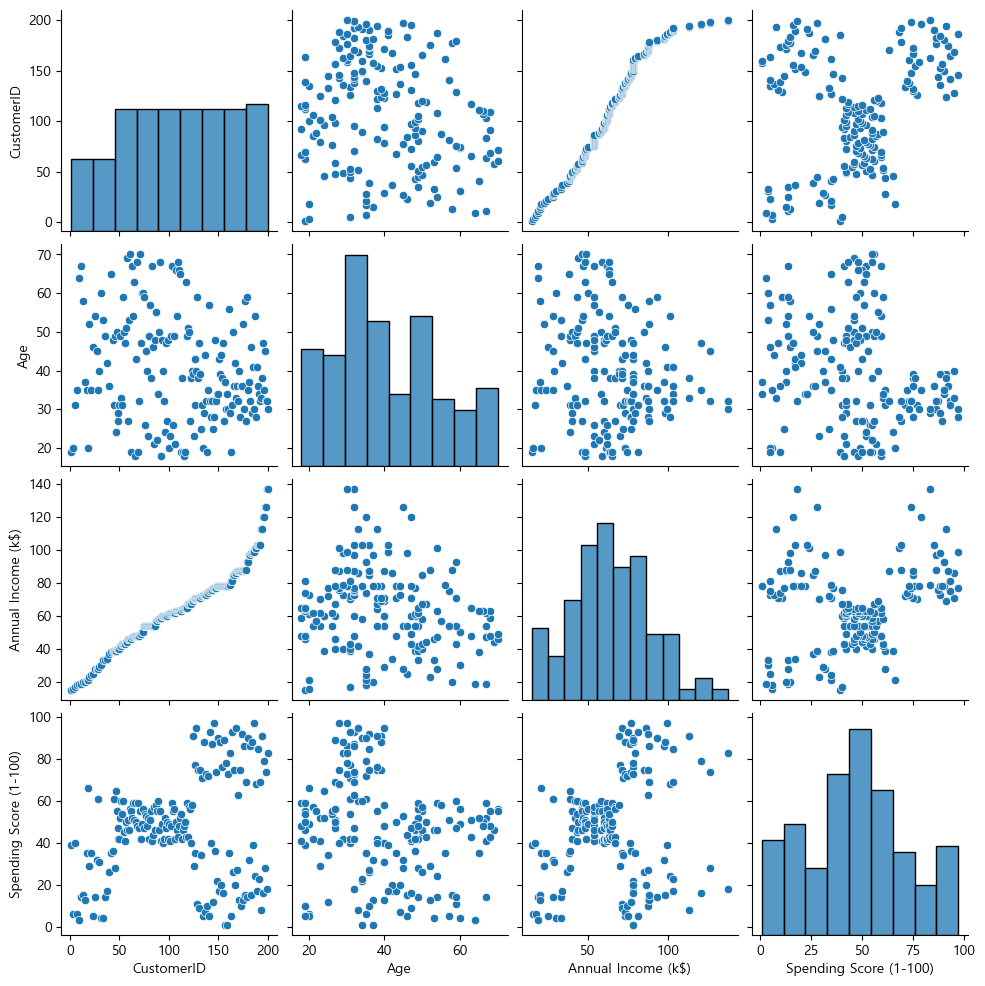

In [50]:
#이상치 제거 후 페어플롯
sns.pairplot(df_filter)
plt.show()

### 가설 설정
- 알 수 있는 사실:
    1. 성별에 따른 평균 소비 점수는 거의 차이가 없다.
    2. 나이대별 소비 점수는 20대에서 40대 사이에서 높게 나왔다.
    3. 소득과 소비 점수는 비례하지 않다. --> 소득이 적은데 소비 점수가 높은 경우를 이상치로 설정하여 제거하면 일정 수준(소득 ~80)까지는 비례하면서 올라가는 모습을 볼 수 있었다.
    4. 대체로 30~40대 전후로 수입이 상대적으로 낮다.
    5. 나이가 적은데 소비 점수가 매우 높은 사람들이 있다.

- 나이가 적은데 수입이 높은 고객은 거의 없는데 반해 높은 소비 점수를 받은 고객들이 많아 소득이 적은데 소비 점수가 높은 경우를 이상치로 잡고 제외하였더니 20대 초반에 분포하던 데이터들이 사라졌다.
- 이 후 산점도를 통해 수입이 많아질 수록 소비 점수가 어느정도 비례하여 올라간다는 것을 확인할 수 있었다.